In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
data=pd.read_table("./Data_Extract_From_World_Development_Indicators_2/f55a1b6c-6a50-4ee3-bfc3-c775ea8759cc_Data.txt")

In [6]:
data


,Time,Time Code,Country Name,Country Code,Access to electricity (% of population) [EG.ELC.ACCS.ZS],Agricultural land (% of land area) [AG.LND.AGRI.ZS],Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS],"Secondary education, pupils [SE.SEC.ENRL]",GDP per capita (current US$) [NY.GDP.PCAP.CD],Rural population (% of total population) [SP.RUR.TOTL.ZS],...,Children out of school (% of primary school age) [SE.PRM.UNER.ZS],"Pupil-teacher ratio, primary [SE.PRM.ENRL.TC.ZS]","Gross intake ratio in first grade of primary education, total (% of relevant age group) [SE.PRM.GINT.ZS]","School enrollment, primary (gross), gender parity index (GPI) [SE.ENR.PRIM.FM.ZS]","Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Population, total [SP.POP.TOTL]",Proportion of seats held by women in national parliaments (%) [SG.GEN.PARL.ZS],Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.10.TO]
0,2015,YR2015,Afghanistan,AFG,71.500000,58.067580,9.232694,2698816.0,578.466353,75.197000,...,NaN,44.32877,108.47540,0.68839,1.679000,3.441360e+07,27.700000,0.281553,1.451315,NaN
1,2015,YR2015,Albania,ALB,100.000000,42.857666,9.526138,315079.0,3952.830781,42.566000,...,2.20127,18.61557,111.00670,1.03130,17.080000,2.880703e+06,20.700000,10.232012,2.230000,NaN
2,2015,YR2015,Algeria,DZA,99.943069,17.405929,8.826316,NaN,4177.888966,29.152000,...,0.68412,23.83613,108.11130,0.95230,11.206000,3.972802e+07,31.600000,0.427837,3.763467,NaN
3,2015,YR2015,American Samoa,ASM,NaN,24.500000,NaN,NaN,11843.331183,12.762000,...,NaN,NaN,NaN,NaN,NaN,5.581200e+04,NaN,NaN,1.248050,NaN
4,2015,YR2015,Andorra,AND,100.000000,40.021275,NaN,4395.0,36039.653496,11.655000,...,NaN,9.93795,NaN,NaN,NaN,7.801100e+04,39.300000,NaN,0.842204,NaN
5,2015,YR2015,Angola,AGO,42.000000,47.477340,8.421779,NaN,4166.979684,36.554000,...,NaN,50.02951,NaN,0.87413,7.279000,2.788438e+07,36.800000,7.120381,0.943576,NaN
6,2015,YR2015,Antigua and Barbuda,ATG,100.000000,20.454545,5.641336,8048.0,14526.588085,75.000000,...,1.21900,14.33428,114.36870,0.96619,NaN,9.356600e+04,11.100000,NaN,4.025737,NaN
7,2015,YR2015,Argentina,ARG,99.823578,54.335712,12.280693,4501734.0,13789.060425,8.497000,...,0.05630,NaN,105.51890,0.99881,7.643000,4.313197e+07,NaN,3.067487,2.731160,NaN
8,2015,YR2015,Armenia,ARM,100.000000,58.893570,14.684982,240291.0,3607.296697,36.915000,...,6.96742,NaN,96.09745,1.01521,18.261000,2.925553e+06,10.700000,14.056075,3.200000,NaN
9,2015,YR2015,Aruba,ABW,100.000000,11.111111,NaN,NaN,25796.380251,56.892000,...,NaN,NaN,NaN,NaN,NaN,1.043410e+05,NaN,NaN,-0.450586,NaN


In [7]:
data.isna().sum()

Time                                                                                                                                         3
Time Code                                                                                                                                    5
Country Name                                                                                                                                 5
Country Code                                                                                                                                 5
Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                                                     8
Agricultural land (% of land area) [AG.LND.AGRI.ZS]                                                                                         15
Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS]                                                                                          145

In [8]:
data=data.drop(columns=["Time","Time Code","Country Name","Number of people spending more than 10% of household consumption or income on out-of-pocket health care expenditure [SH.UHC.OOPC.10.TO]","Total debt service (% of GNI) [DT.TDS.DECT.GN.ZS]","Bank capital to assets ratio (%) [FB.BNK.CAPA.ZS]"])

In [9]:
data=data.dropna(axis='rows')
data.isna().sum()

Country Code                                                                                                0
Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                    0
Agricultural land (% of land area) [AG.LND.AGRI.ZS]                                                         0
Secondary education, pupils [SE.SEC.ENRL]                                                                   0
GDP per capita (current US$) [NY.GDP.PCAP.CD]                                                               0
Rural population (% of total population) [SP.RUR.TOTL.ZS]                                                   0
Population density (people per sq. km of land area) [EN.POP.DNST]                                           0
Life expectancy at birth, total (years) [SP.DYN.LE00.IN]                                                    0
Adjusted net enrollment rate, primary (% of primary school age children) [SE.PRM.TENR]                      0
Children o

In [10]:
data.index=data["Country Code"]
data=data.drop(columns=["Country Code"])

In [11]:
variablesNames=["electricity",
"agricultural",
"secondary_pupils",	
"GDP_p_c",
"rural_population",
"population_density",
"life_expectancy",
"enrollment_rate",
"out_of_school",
"pupil_teacher_ratio",
"gross_intake",
"GPI",
"unemployment",
"population",
"proportion_women",
"GDP_growth"]
data.columns=variablesNames

In [12]:
data

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
Country Code,,,,,,,,,,,,,,,,
ALB,100.000000,42.857666,315079.0,3952.830781,42.566000,105.135146,78.025000,97.79873,2.20127,18.61557,111.00670,1.03130,17.080000,2.880703e+06,20.700000,2.230000
AUT,100.000000,32.941726,691071.3,44176.671743,42.285000,104.730793,81.190244,88.62591,0.47045,10.58415,98.79947,0.99097,5.723000,8.642699e+06,30.600000,1.142980
BHS,100.000000,1.398601,25766.0,31512.856555,17.254000,37.383217,73.088000,79.96521,18.40080,21.04116,87.15463,0.97338,12.000000,3.742060e+05,13.200000,1.044960
BHR,100.000000,11.053985,92454.0,22688.944400,11.001000,1763.304558,76.762000,98.02753,1.31748,11.73164,101.52670,1.00991,1.076000,1.371851e+06,7.500000,2.861968
BLR,100.000000,42.242016,644153.0,5949.106307,22.819000,46.751942,73.624390,94.25545,1.50754,17.57007,102.54340,1.00156,5.913000,9.489616e+06,27.300000,-3.829571
BEL,100.000000,43.857332,1217912.0,40441.052042,2.124000,372.331440,80.992683,98.38347,0.97579,11.23127,98.58350,0.99830,8.482000,1.127420e+07,39.300000,1.739580
BLZ,91.800000,7.014467,37856.0,4883.179011,54.594000,15.823455,74.034000,99.28398,0.41269,20.43642,105.28140,0.95398,9.970000,3.609330e+05,3.100000,3.431950
BOL,91.522822,34.765070,1153379.0,3035.972215,31.607000,10.033906,70.277000,88.70123,11.03696,18.10837,94.79886,0.97941,3.066000,1.086973e+07,53.100000,4.857188
BFA,21.789345,44.225146,965550.0,575.314454,72.470000,66.193801,59.919000,69.95995,29.94701,42.17715,105.40330,0.97444,6.704000,1.811062e+07,9.400000,3.894548


In [13]:
corOfData=data.corr()
corOfData

,electricity,agricultural,secondary_pupils,GDP_p_c,rural_population,population_density,life_expectancy,enrollment_rate,out_of_school,pupil_teacher_ratio,gross_intake,GPI,unemployment,population,proportion_women,GDP_growth
electricity,1.000000,-0.213015,0.001754,0.407620,-0.679918,0.149363,0.868189,0.693242,-0.721994,-0.859718,-0.357488,0.531558,0.161777,-0.027474,0.121554,-0.004903
agricultural,-0.213015,1.000000,-0.019631,-0.246361,0.181667,-0.082889,-0.292264,-0.155880,0.151598,0.239836,0.031228,-0.128189,0.172609,-0.018581,0.126185,0.055617
secondary_pupils,0.001754,-0.019631,1.000000,-0.113457,0.143631,-0.089189,-0.045585,-0.011320,0.011662,0.069820,0.027750,0.138958,-0.179322,0.997718,-0.008159,0.068565
GDP_p_c,0.407620,-0.246361,-0.113457,1.000000,-0.632758,0.127719,0.631966,0.383217,-0.398751,-0.569991,-0.161076,0.259309,-0.063915,-0.119106,0.235060,-0.016753
rural_population,-0.679918,0.181667,0.143631,-0.632758,1.000000,-0.216131,-0.767453,-0.532571,0.524037,0.683930,0.342593,-0.379680,-0.043463,0.162062,-0.193973,0.055336
population_density,0.149363,-0.082889,-0.089189,0.127719,-0.216131,1.000000,0.193328,0.143170,-0.151466,-0.163849,0.011943,0.132247,-0.107783,-0.091984,-0.160294,0.150510
life_expectancy,0.868189,-0.292264,-0.045585,0.631966,-0.767453,0.193328,1.000000,0.641236,-0.666292,-0.860190,-0.321068,0.534794,0.069815,-0.065698,0.222935,0.018816
enrollment_rate,0.693242,-0.155880,-0.011320,0.383217,-0.532571,0.143170,0.641236,1.000000,-0.982079,-0.697091,0.198245,0.426263,0.155605,-0.035060,0.203263,-0.251176
out_of_school,-0.721994,0.151598,0.011662,-0.398751,0.524037,-0.151466,-0.666292,-0.982079,1.000000,0.718345,-0.190400,-0.436499,-0.155109,0.034550,-0.207221,0.267788
pupil_teacher_ratio,-0.859718,0.239836,0.069820,-0.569991,0.683930,-0.163849,-0.860190,-0.697091,0.718345,1.000000,0.321789,-0.569198,-0.204960,0.090060,-0.127981,0.137061


In [14]:
for i, row in enumerate(corOfData.values):
    for j, column in enumerate(row):
        if i>j and (corOfData.values[i][j]>0.5 or corOfData.values[i][j]<-0.5) and (corOfData.index[i] != corOfData.index[j]) :
            print(corOfData.index[i]," - ",corOfData.index[j])    

rural_population  -  electricity
rural_population  -  GDP_p_c
life_expectancy  -  electricity
life_expectancy  -  GDP_p_c
life_expectancy  -  rural_population
enrollment_rate  -  electricity
enrollment_rate  -  rural_population
enrollment_rate  -  life_expectancy
out_of_school  -  electricity
out_of_school  -  rural_population
out_of_school  -  life_expectancy
out_of_school  -  enrollment_rate
pupil_teacher_ratio  -  electricity
pupil_teacher_ratio  -  GDP_p_c
pupil_teacher_ratio  -  rural_population
pupil_teacher_ratio  -  life_expectancy
pupil_teacher_ratio  -  enrollment_rate
pupil_teacher_ratio  -  out_of_school
GPI  -  electricity
GPI  -  life_expectancy
GPI  -  pupil_teacher_ratio
population  -  secondary_pupils


In [15]:
from seaborn import clustermap

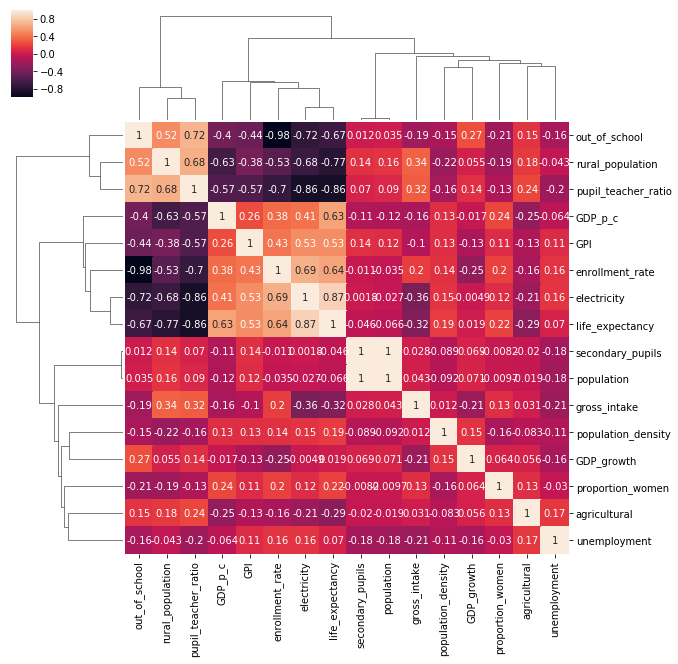

In [19]:

clustermap(corOfData,annot=True)

In [24]:
print(max(data["pupil_teacher_ratio"]))
print(min(data["pupil_teacher_ratio"]))

55.54179
8.45773


In [25]:
data["pupil_teacher_ratio"]


Country Code
ALB    18.61557
AUT    10.58415
BHS    21.04116
BHR    11.73164
BLR    17.57007
BEL    11.23127
BLZ    20.43642
BOL    18.10837
BFA    42.17715
CPV    21.94779
CMR    41.46571
TCD    55.54179
CHL    18.37780
COL    24.23937
CRI    12.67630
CIV    42.05050
HRV    13.70200
CUB     8.89917
CYP    11.91513
DJI    33.02204
DOM    18.29098
SLV    29.69441
SWZ    27.58272
GEO     9.01662
DEU    12.22305
GRC     9.64365
HND    29.14566
HUN    10.97863
ISL    10.14405
IRN    26.77414
         ...   
ECA    17.82266
TEC    16.56762
EUU    13.40088
HPC    39.91367
HIC    14.02746
IBD    21.50841
IBT    24.93134
IDB    34.17311
IDX    36.95185
LCN    21.72139
LAC    21.98897
TLA    22.15856
LDC    38.00919
LMY    25.04042
LIC    40.13131
LMC    28.01515
MEA    19.94048
MNA    22.27264
TMN    22.25553
MIC    23.27888
OED    15.65422
OSS    23.55641
PST    14.30129
PRE    35.34598
SST    22.66048
SSF    37.50596
SSA    37.50958
TSS    37.50596
UMC    18.32687
WLD    23.10596
Name: pupil